In [5]:
#importing all needed libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [7]:
# Loading the dataset
df = pd.read_csv('/content/train.csv')
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
# checking data for null values
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [9]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
# Data Preprocessing

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['workex'] = label_encoder.fit_transform(df['workex'])
df['specialisation'] = label_encoder.fit_transform(df['specialisation'])
df['status'] = label_encoder.fit_transform(df['status'])  # Target variable encoding

In [11]:
# One-Hot Encoding for features with multi-category
df = pd.get_dummies(df, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t'], drop_first=True)

In [12]:
# Calculating each specializations median salary
median_salaries = df.groupby('specialisation')['salary'].median()

# Fill NaN values in the 'salary' column with the corresponding median salary
df['salary'] = df.apply(lambda row: median_salaries[row['specialisation']] if pd.isnull(row['salary']) else row['salary'], axis=1)
df

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,0,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,True,True,True,False,False,True
1,2,0,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,False,True,False,True,False,True
2,3,0,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,False,False,False,False,False,False
3,4,0,56.00,52.00,52.00,0,66.0,1,59.43,0,255000.0,False,False,False,True,False,True
4,5,0,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,0,74.49,1,400000.0,True,True,True,False,False,False
211,212,0,58.00,60.00,72.00,0,74.0,0,53.62,1,275000.0,True,True,False,True,False,True
212,213,0,67.00,67.00,73.00,1,59.0,0,69.72,1,295000.0,True,True,True,False,False,False
213,214,1,74.00,66.00,58.00,0,70.0,1,60.23,1,204000.0,True,True,True,False,False,False


In [13]:
# Scaling numerical features
scaler = StandardScaler()
numeric_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [14]:
# Splitting data into features (X) and target (y)
X = df.drop(columns=['sl_no', 'status', 'salary'])  # Excluding 'salary' from features
y = df['status']

In [15]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting data into 80 percent for training and 20 for testin

In [25]:
# Dictionary to store model performance
results = {}

# List of models to try / use with this dataset
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability output
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),

}


Training K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



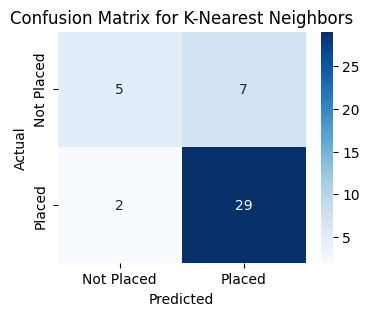

K-Nearest Neighbors trained and evaluated.
Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



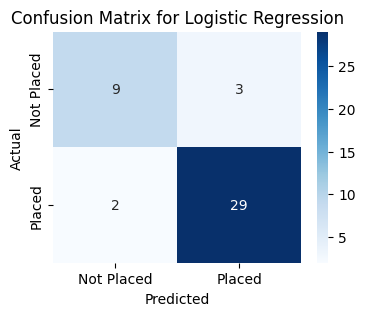

Logistic Regression trained and evaluated.
Training Gradient Boosting...
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



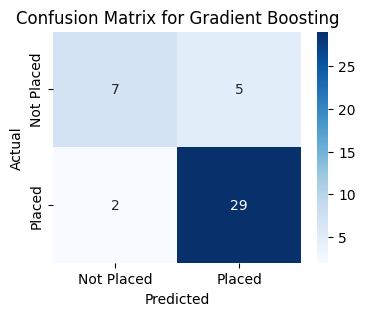

Gradient Boosting trained and evaluated.
Training Decision Tree...
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.90      0.87      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.84      0.84      0.84        43



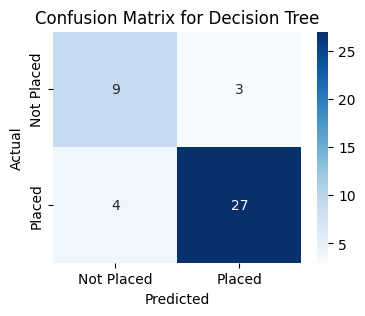

Decision Tree trained and evaluated.
Training Naive Bayes...
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.81      0.84      0.83        31

    accuracy                           0.74        43
   macro avg       0.68      0.67      0.67        43
weighted avg       0.74      0.74      0.74        43



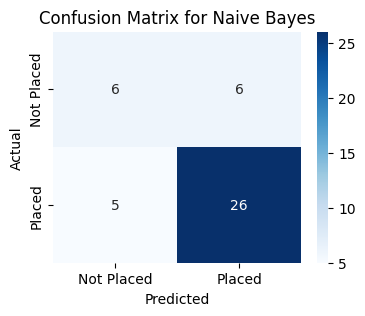

Naive Bayes trained and evaluated.
Training Random Forest...
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



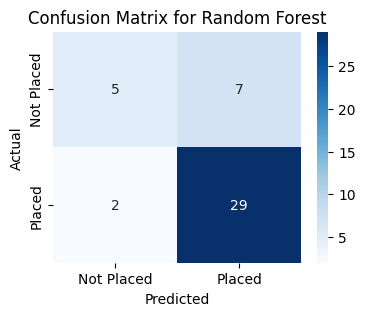

Random Forest trained and evaluated.
Training SVM...
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



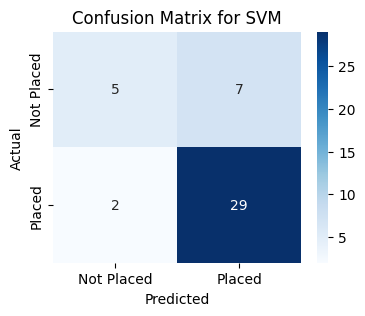

SVM trained and evaluated.
Training XGBoost...
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


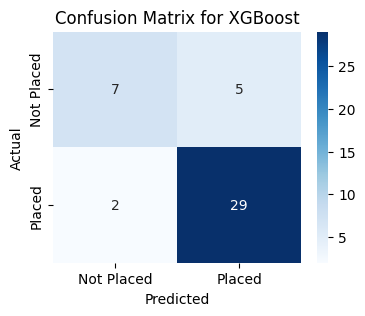

XGBoost trained and evaluated.


In [26]:
trained_models = {}  # Dictionary to store trained models


import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Placed', 'Placed'],
                yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"{name} trained and evaluated.")

In [27]:
# Displaying the results summary
results_df = pd.DataFrame(results).T
print("\nSummary of Model Performance:\n", results_df)


Summary of Model Performance:
                      accuracy  precision    recall  f1_score
K-Nearest Neighbors  0.790698   0.805556  0.935484  0.865672
Logistic Regression  0.883721   0.906250  0.935484  0.920635
Gradient Boosting    0.837209   0.852941  0.935484  0.892308
Decision Tree        0.837209   0.900000  0.870968  0.885246
Naive Bayes          0.744186   0.812500  0.838710  0.825397
Random Forest        0.790698   0.805556  0.935484  0.865672
SVM                  0.790698   0.805556  0.935484  0.865672
XGBoost              0.837209   0.852941  0.935484  0.892308


In [28]:
# trained models
trained_models

{'K-Nearest Neighbors': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'Naive Bayes': GaussianNB(),
 'Random Forest': RandomForestClassifier(),
 'SVM': SVC(probability=True),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=No

In [29]:
# Finding the best model based on F1-score

best_model_name = results_df['f1_score'].idxmax()
best_model = trained_models[best_model_name]
best_f1_score = results_df['f1_score'].max()

print(f"\nThe best model is {best_model_name} with an F1-score of {best_f1_score:.4f}")


The best model is Logistic Regression with an F1-score of 0.9206


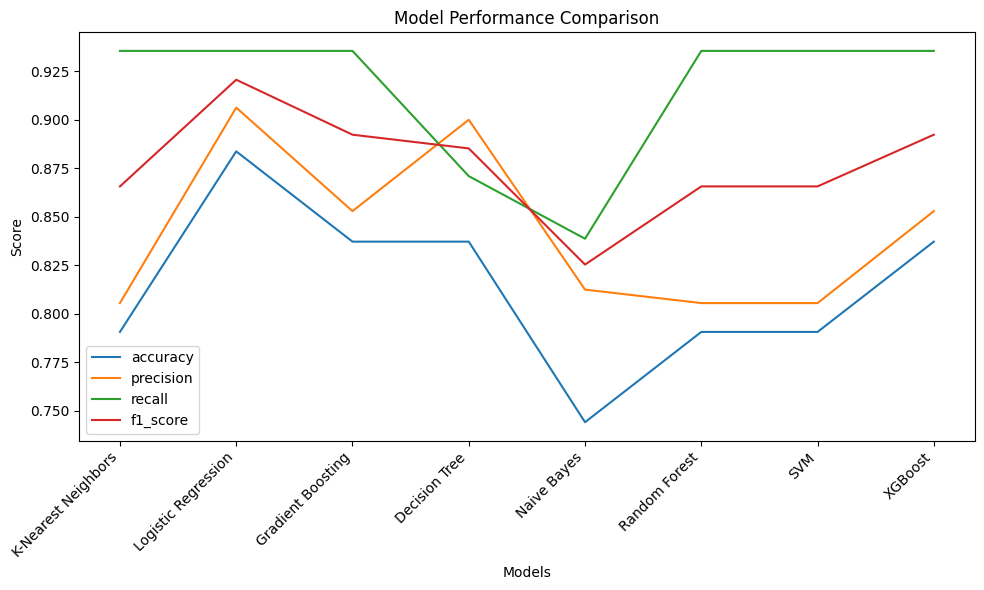

In [30]:
import matplotlib.pyplot as plt

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, ax = plt.subplots(figsize=(10, 6))

for metric in metrics:
    ax.plot(results_df.index, results_df[metric], label=metric)

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() # to prevent labels from overlapping
plt.show()

In [31]:
#Voting classifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Model: {rf_grid_search.best_params_}")

# Hyperparameter tuning for GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
print(f"Best Gradient Boosting Model: {gb_grid_search.best_params_}")

Best Random Forest Model: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting Model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier - Accuracy: 0.8372, Precision: 0.8529, Recall: 0.9355, F1-score: 0.8923
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



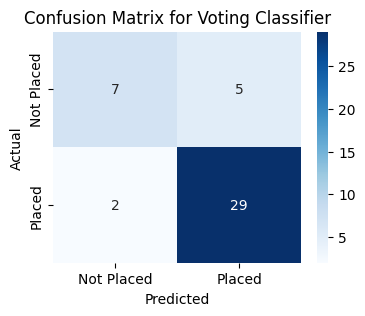

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

# Create a voting classifier
# trained_models is a dictionay saved earlier with the models already run

voting_clf = VotingClassifier(estimators=[(name, model) for name, model in trained_models.items()], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print(f"Voting Classifier - Accuracy: {accuracy_voting:.4f}, Precision: {precision_voting:.4f}, Recall: {recall_voting:.4f}, F1-score: {f1_voting:.4f}")
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'])
plt.title(f'Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()